나이브 베이즈(Naive Bayes)

나이브는 순진하는 뜻으로, 이유는 데이터셋의 모든 특징들이 동등하고 독립적이라고 가정하기 떄문.

나이브 베이즈 분류를 이해하기 위해서는 기본이 되는 베이즈의 정리를 알아야 함.

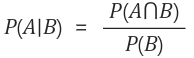

조건부 확률 P(A|B)는 사건 B가 발생한 경우 A의 확률.

베이즈 정리는 P(A|B)의 추정이 P(A∩B)와 P(B)에 기반을 두어야 한다는 정리

13.1 바보 스팸 필터

가능한 모든 메시지에 의의로 메시지를 선택하는 공간이 있다고 가정.

메시지가 스팸 : S

메시지에 비아그라라는 단어가 포함되는 경우 : V

베이즈 정리를 사용하면 메시지에 비아그라라는 단어가 포함되었을 때, 해당 메시지가 스팸일 확률은 다음과 같다.

$$ P(S|V) = {{[P(V|S)P(S)]} \over {[P(V|S)P(S)+P(V|\neg S)P(\neg S)]}} $$

분자는 메시지가 스팸이면서 비아그라 단어를 포함하고 있을 확률을 나타냄.

반면, 부모는 메시지가 비아그라라는 단어가 포함되었을 확률.

즉, 이 식은 비아그라라는 단어가 포함된 모든 메시지 중에서 스팸 메시지의 비율을 나타낸다고 이해할 수 있다.

만약 수많은 스팸 메시지와 스팸이 아닌 메시지를 갖고 있다고, $$P(V|S)$$ $$P(V| \neg S)$$를 쉽게 추정할 수 있다.
만약 메시지가 스팸일 확률과 스팸이 아닌 확률이 동일하다면, 즉,

$$ P(S) = P(\neg S) = 0.5 $$

위의 식이 다음과 같이 정리 됨.

$$ P(S|V) = {{P(V|S) \over [P(V|S) + P(V|\neg S)]}} $$

예를 들어 스팸 메시지 중 50%, 스팸이 아닌 메시지 중 1%만이 비아그라라는 단어를 포함한다면,

비아그라라는 단어를 포함하고 있는 메시지가 스팸일 확률은,

0.5/0.5 + 0.01 = 98%

13.2 조금 더 똑똑한 스팸 필터

이제 더 많은 단어 w1, ..., wn이 주어졌다고 가정.

확률이론을 적용하기 위해 wi가 메시지에 포함되는 경우를 Xi로 나타내고,

스팸 메시지에 i번째 단어가 포함되어 있는 확률인 $$P(Xi|S)$$ 와 스팸이 아닌 메시지에 i번째 단어가 포함되어 있는 확률인 $$P(Xi|\neg S)$$가 주어졌다고 가정.

나이브 베이즈(Naive Bayes)의 핵심은 '메시지가 스팸이냐 아니냐가 주어진다는 조건 하에 각 단어의 존재(혹은 부재)는 서로 조건부 독립적이다'라는 (말도 안 되는) 가정에 기반에 둔다.

이 가정을 직관적으로 이해하면, 어떤 스팸 메시지가 '비아그라'라는 단어를 포함하고 있다는 점이 같은 메시지가 '롤렉스'라는 단어를 포함하고 있는지를 판단하는 데 도움을 주지 않는다는 것을 의미.

$$ P(X1 = x1,...,Xn = xn|S) = P(X1 = x1|S) * ... * P(Xn = xn|S) $$

'나이브(단순한)' 베이즈라는 이름에서 알 수 있듯, 나이즈 베이즈는 너무 극단적인 가정을 함.

예를 들면 사전에 수록된 단어가 '비아그라'와 '롤렉스'뿐이며, 모든 스팸 메시지의 반은 '값싼 비아그라'에 대한 메시지이고, 나머지 스팸 메시지는 '정품 롤렉스'에 대한 메시지라고 가정. 이런 경우 나이브 베이즈는 스팸 메시지에 '비아그라'와 '롤렉스'라는 단어가 포함될 확률을 다음과 같이 추정

$$ P(X1 = 1, X2 = 1|S)  =$$ 
$$P(X1 = 1|S)P(X2 = 1|S) =$$
$$.5*.5 =$$
$$ 25 $$

현실에서는 '비아그라'와 '롤렉스'가 동시에 등장하지 않는다는 가정이 없었기 때문.

비록 말도 안되는 가정으로 모델을 만들었지만, 성능은 상당히 뛰어나며, 실제 스팸필터로 사용 가능.

'비아그라'라는 단어만으로 스팸을 걸러 내는 필터에서도 사용된 베이즈 정리를 통해 메시지가 스팸일 확률을 다음과 같이 계산

$$ P(S|X = x)  =$$
$$ {P(X=x|S) \over [P(X=s|S)+P(X=x|\neg S)]} $$

나이브 베이즈 가정에 따르면, 간단하게 각 단어가 메시지에 포함될 확률 값을 모두 곱해서 위 식의 우현에 위치한 값을 모두 구할 수 있음.

실제 구현할 땐, 끊임없이 확률 값을 곱하는 것을 피하자. 컴퓨터가 0에 가까운 부동소수점을 제대로 처리하지 못해서 언더플로 문제가 발생하기 때문.

기본적인 수학 내용을 더듬으면,

log(ab) = log a + log b 이고, exp(log x) = x.

그럼 소수점 문제를 피하기 위해 p1 * ... * pn 는 다음과 같이 계산.

$$ \exp(\log(p1) + ... + \log(pn)) $$

이제 스팸이나 스팸이 아닌 메시지에 단어 wi가 포함될 확률인 $$P(Xi|S) 와 P(Xi|\neg S)$$의 값을 추정하는 문제가 남음.

만약 이미 스팸과 스팸이 아닌 메시지로 분류된 '학습'메시지가 충분히 주어졌다면, P(Xi|S)를 추정할 수 있는 가장 간단한 방법은 스팸 메시지 중 wi가 포함되어 있는 메시지의 비율을 사용하는 것.

하지만 단점이 있음.

주어진 학습 데이터에 '데이터'라는 단어는 스팸이 아닌 메시지에만 포함되어 있다고 상상.

즉, P("데이터"|S)=0 일것.

그렇다면 나이브 베이즈 분류기는 '데이터'라는 단어가 들어간 메시지를 항상 스팸 메시지가 아니라고 예측 할 것.

심지어 '값싼 비아그라와 정품 롤렉스에 대한 데이터'라는 메시지도 스팸이 아니라고 예측할 것.

이런 문제를 처리하기 위해서는 일종의 smoothing(평활화)가 필요.

Smoothing을 위해 가짜 빈도수(pseudocount) k를 결정하고 스팸 메시지에서 i번째 단어가 나올 확률을 다음과 같이 추정 할 수 있다.

$$P(Xi|S) = {(k+wi를 포함하고 있는 스팸 수) \over (2k + 스팸 수)}$$

$$P(Xi|\neg S) 도 비슷하게 계산 가능. $$

즉, 스팸 메시지에서 i번째 단어가 나올 확률을 계산할 때 해당 단어가 포함된 스팸과 포함되지 않을 스팸이 이미 각각 k번씩 나왔다고 가정.

예를 들어 '데이터'라는 단어는 98개의 스팸 문서에서 단 한번도 나타나지 않았지만, k가 1이라면
P("데이터"|S)를 1/100 = 0.01로 계산할 수 있다.

즉, '데이터'라는 단어가 포함된 메시지가 스팸 메시지일 확률을 0이 아닌 다른 확률값으로 설정할 수 있게 해준다.

Reference : 
    * https://gomguard.tistory.com/69
    * https://ko.wikipedia.org/wiki/%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98
    * 밑바닥부터 시작하는 데이터과학 13장